# Gradient of Image

## import library

In [135]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [136]:
I0 = img.imread('test.jpeg')
print(type(I0))

<class 'numpy.ndarray'>


## check the size of the input image

In [137]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [138]:
map1 = I0[:,:,0].astype('float64')
map2 = I0[:,:,1].astype('float64')
map3 = I0[:,:,2].astype('float64')




In [139]:
map4 = (map1+map2+map3)//3

print(map4)

[[114. 105. 110. ... 140. 130.   3.]
 [112. 112. 102. ... 139. 133.   1.]
 [102. 114. 102. ... 147. 130.   2.]
 ...
 [109. 108. 115. ... 176. 197.   8.]
 [103. 112. 101. ... 189. 174.   0.]
 [ 99. 103.  96. ... 180. 164.   1.]]


In [140]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = map4
print(I)
    
    
num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

[[114. 105. 110. ... 140. 130.   3.]
 [112. 112. 102. ... 139. 133.   1.]
 [102. 114. 102. ... 147. 130.   2.]
 ...
 [109. 108. 115. ... 176. 197.   8.]
 [103. 112. 101. ... 189. 174.   0.]
 [ 99. 103.  96. ... 180. 164.   1.]]
number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [141]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = I/np.max(I)
print(I) 

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

[[0.4488189  0.41338583 0.43307087 ... 0.5511811  0.51181102 0.01181102]
 [0.44094488 0.44094488 0.4015748  ... 0.54724409 0.52362205 0.00393701]
 [0.4015748  0.4488189  0.4015748  ... 0.57874016 0.51181102 0.00787402]
 ...
 [0.42913386 0.42519685 0.45275591 ... 0.69291339 0.77559055 0.03149606]
 [0.40551181 0.44094488 0.3976378  ... 0.74409449 0.68503937 0.        ]
 [0.38976378 0.40551181 0.37795276 ... 0.70866142 0.64566929 0.00393701]]
maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [143]:
aa = I[:5,:5]
print(aa)
test  = np.zeros(aa.shape)
print(test)

for i in range(1,len(aa)):
    test[i] = aa[i,:] - aa[i-1,:]

print(test)


[[0.4488189  0.41338583 0.43307087 0.44094488 0.43700787]
 [0.44094488 0.44094488 0.4015748  0.42125984 0.42913386]
 [0.4015748  0.4488189  0.4015748  0.42913386 0.43700787]
 [0.42519685 0.47637795 0.42519685 0.42519685 0.42913386]
 [0.42125984 0.45275591 0.4015748  0.42913386 0.40944882]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 0.          0.          0.          0.          0.        ]
 [-0.00787402  0.02755906 -0.03149606 -0.01968504 -0.00787402]
 [-0.03937008  0.00787402  0.          0.00787402  0.00787402]
 [ 0.02362205  0.02755906  0.02362205 -0.00393701 -0.00787402]
 [-0.00393701 -0.02362205 -0.02362205  0.00393701 -0.01968504]]


In [166]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    temp = np.zeros(I.shape)

    for i in range(len(I)-1):
        temp[i,:] = I[i+1,:]
    temp[-1,:] = I[-1,:]

    D = I-temp 
    return D

In [167]:
res = compute_derivative_x_forward(I)
print(res)

[[ 0.00787402 -0.02755906  0.03149606 ...  0.00393701 -0.01181102
   0.00787402]
 [ 0.03937008 -0.00787402  0.         ... -0.03149606  0.01181102
  -0.00393701]
 [-0.02362205 -0.02755906 -0.02362205 ...  0.02362205 -0.02755906
   0.00393701]
 ...
 [ 0.02362205 -0.01574803  0.05511811 ... -0.0511811   0.09055118
   0.03149606]
 [ 0.01574803  0.03543307  0.01968504 ...  0.03543307  0.03937008
  -0.00393701]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


- backward difference : $ I[x, y] - I[x-1, y] $ 

In [170]:
def compute_derivative_x_backward(I):
    

    dd = np.zeros(I.shape)
    D = np.zeros(I.shape)

    for i in range(1,len(I)):
        dd[i,:] = I[i-1,:]
    dd[0,:] = I[0,:]
    
    D = I-dd 
    return D

In [171]:
res = compute_derivative_x_backward(I)
print(res)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00787402  0.02755906 -0.03149606 ... -0.00393701  0.01181102
  -0.00787402]
 [-0.03937008  0.00787402  0.         ...  0.03149606 -0.01181102
   0.00393701]
 ...
 [ 0.01574803  0.00393701  0.01574803 ... -0.03543307  0.05511811
   0.02362205]
 [-0.02362205  0.01574803 -0.05511811 ...  0.0511811  -0.09055118
  -0.03149606]
 [-0.01574803 -0.03543307 -0.01968504 ... -0.03543307 -0.03937008
   0.00393701]]


- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [176]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    tmp = np.zeros([I.shape[0]+2,I.shape[1]])

    tmp[0] = I[0,:]
    tmp[-1] = I[-1,:]

    for i in range(len(I)):
        tmp[i+1] = I[i,:]
    
    for i in range(1,len(tmp)-1):
        D[i-1] = (tmp[i+1,:]-tmp[i-1,:])//2

    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

In [177]:
res = compute_derivative_x_central(I)
print(res)

[[-1.  0. -1. ... -1.  0. -1.]
 [-1.  0. -1. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0.  0.]
 ...
 [-1.  0. -1. ...  0. -1. -1.]
 [-1. -1. -1. ...  0. -1. -1.]
 [-1. -1. -1. ... -1. -1.  0.]]


## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [172]:
def compute_derivative_y_forward(I):
    D = np.zeros(I.shape)

    bb = np.zeros([I.shape[0],I.shape[1]+1])

    bb[:,-1] = I[:,-1]
    bb[:,0:-1] = I[:,:]

    partial1 = bb[:,0:-1]
    partial2 = bb[:,1:]

    D = partial1 - partial2
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [173]:
def compute_derivative_y_backward(I):
    D = np.zeros(I.shape)

    bb = np.zeros([I.shape[0],I.shape[1]+1])
    bb[:,0] = I[:,0]
    bb[:,1:]=I 

    partial1 = bb[:,:-1]
    partial2 = bb[:,1:]

    D = partial2 - partial1

    

   
    return D

In [175]:
res2 = compute_derivative_y_backward(I)
print(res2)

[[ 0.         -0.03543307  0.01968504 ...  0.         -0.03937008
  -0.5       ]
 [ 0.          0.         -0.03937008 ... -0.01968504 -0.02362205
  -0.51968504]
 [ 0.          0.04724409 -0.04724409 ...  0.01181102 -0.06692913
  -0.50393701]
 ...
 [ 0.         -0.00393701  0.02755906 ... -0.06692913  0.08267717
  -0.74409449]
 [ 0.          0.03543307 -0.04330709 ...  0.02362205 -0.05905512
  -0.68503937]
 [ 0.          0.01574803 -0.02755906 ...  0.01968504 -0.06299213
  -0.64173228]]


- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [178]:
def compute_derivative_y_central(I):
    
    bb = np.zeros([I.shape[0],I.shape[1]+2])
    bb[:,1:-1]=I
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    bb[:0]=bb[:1]
    bb[:,-1]=bb[:,-2]    
    
    D = [] 
    for i in range(len(bb)):
        tmp = []
        for j in range(len(bb[i])-2):
            tmp.append(bb[i][j+2]-bb[i][j])
        D.append(tmp)
    D = np.array(D)    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

In [179]:
res3 = compute_derivative_y_central(I)
print(res3[:5,:5])

[[ 0.41338583 -0.01574803  0.02755906  0.00393701 -0.02755906]
 [ 0.44094488 -0.03937008 -0.01968504  0.02755906 -0.01181102]
 [ 0.4488189   0.         -0.01968504  0.03543307 -0.03543307]
 [ 0.47637795  0.         -0.0511811   0.00393701 -0.03937008]
 [ 0.45275591 -0.01968504 -0.02362205  0.00787402 -0.01181102]]


## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [181]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    norm1 = compute_derivative_x_central(I)
    norm2 = compute_derivative_y_central(I)

    norm1 = norm1**2 
    norm2 = norm2**2
    norm_gradient = norm1+norm2
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [182]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [183]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [184]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [185]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [186]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [187]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [188]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [189]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [190]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [191]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [192]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [193]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [194]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [195]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [196]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [197]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [198]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


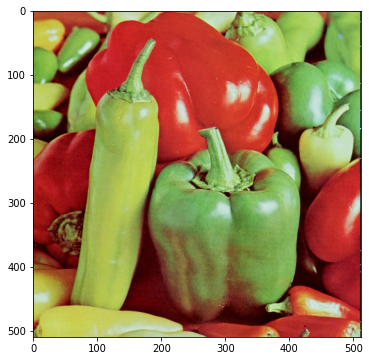

**************************************************
## [RESULT 02]
**************************************************


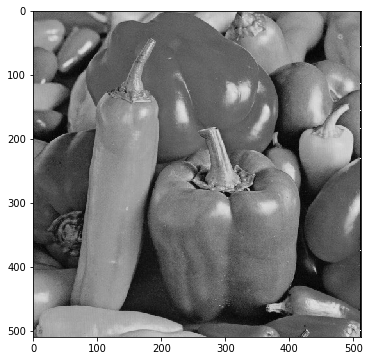

**************************************************
## [RESULT 03]
**************************************************


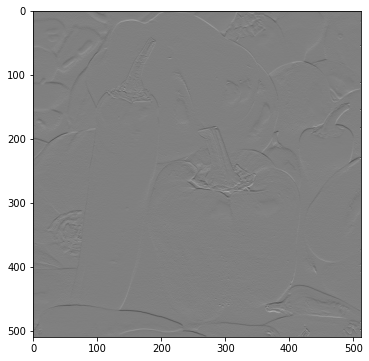

**************************************************
## [RESULT 04]
**************************************************


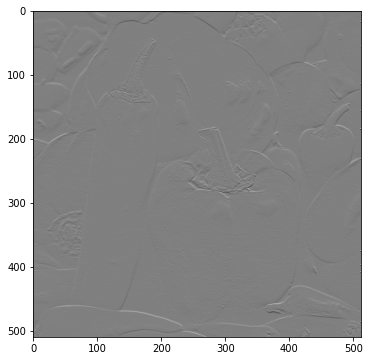

**************************************************
## [RESULT 05]
**************************************************


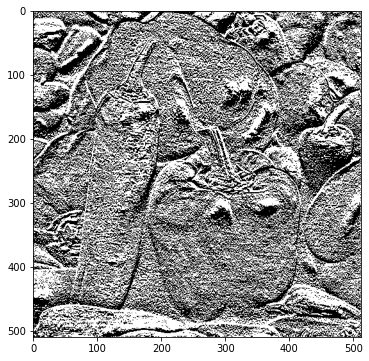

**************************************************
## [RESULT 06]
**************************************************


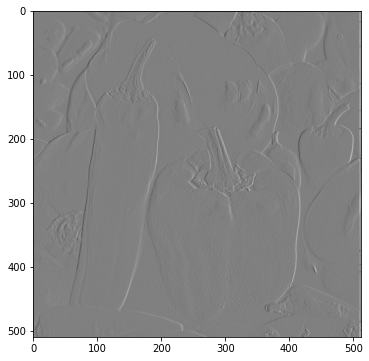

**************************************************
## [RESULT 07]
**************************************************


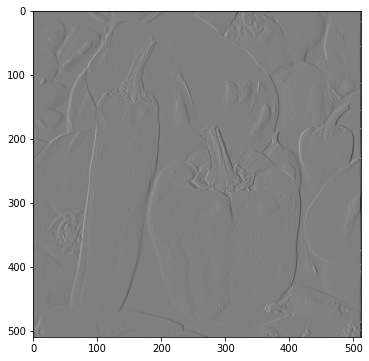

**************************************************
## [RESULT 08]
**************************************************


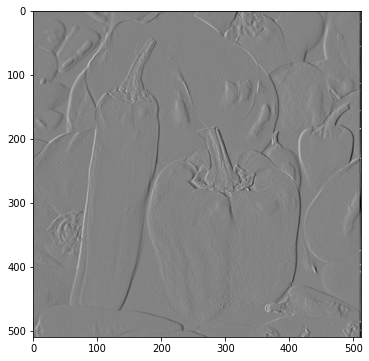

**************************************************
## [RESULT 09]
**************************************************


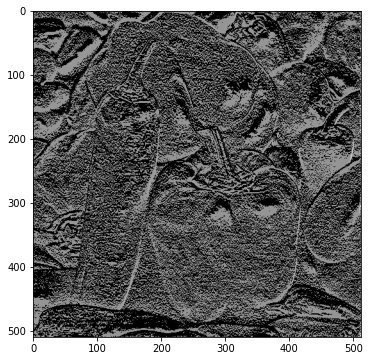

**************************************************
## [RESULT 10]
**************************************************


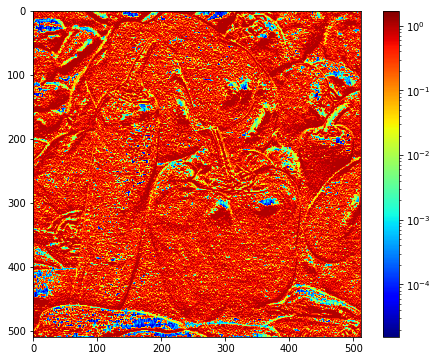

**************************************************
## [RESULT 11]
**************************************************
value1 =  0.007874015748031482
value2 =  0.0
value3 =  0.003937007874015741
value4 =  -0.011811023622047223
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  0.003937007874015748
value3 =  0.015748031496062964
value4 =  -0.011811023622047223
**************************************************
## [RESULT 13]
**************************************************
value1 =  -1.0
value2 =  0.0
value3 =  0.0
value4 =  0.0
**************************************************
## [RESULT 14]
**************************************************
value1 =  0.035433070866141725
value2 =  0.0
value3 =  0.015748031496062964
value4 =  0.0
**************************************************
## [RESULT 15]
**************************************************
value1 =  0.0
value2 =  -0.6417322834645669
value3 =

In [199]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)